In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
import sklearn.metrics as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Salary_Data.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 544.0 bytes


In [6]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
data[data.duplicated()].shape

(0, 2)

In [8]:
X = data['YearsExperience']
y = data['Salary']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [10]:
X_train = np.array(X_train).reshape((len(X_train),1))
y_train = np.array(y_train).reshape((len(y_train),1))

In [11]:
X_test = np.array(X_test).reshape(len(X_test), 1)
y_test = np.array(y_test).reshape(len(y_test), 1)

Training Model

In [12]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

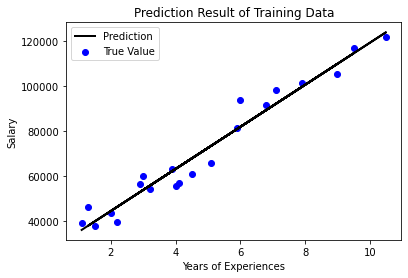

In [13]:

y_train_pred = model.predict(X_train)

plt.figure()
plt.scatter(X_train, y_train, color='blue', label="True Value")
plt.plot(X_train, y_train_pred, color='black', linewidth=2, label="Prediction")
plt.xlabel("Years of Experiences")
plt.ylabel("Salary")
plt.title('Prediction Result of Training Data')
plt.legend()
plt.show()

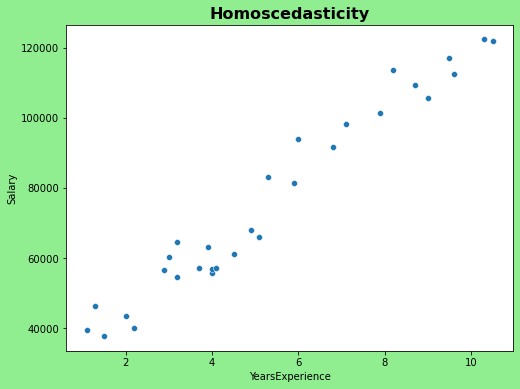

In [16]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = data['YearsExperience'], y = data['Salary'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

 Model Evaluation

Mean Square Error

In [18]:
y_test_pred = model.predict(X_test)

In [19]:
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))

Mean squared error = 37784662.47


Explain variance score

In [20]:
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))


Explain variance score = 0.95


R2 score 

In [22]:
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

R2 score = 0.94


 explain variance score and the R2 score hit 0.9 above. This shows our linear model is not overfitted and can work nicely to predict the salary based on new data.



# we can conclude that our salary is grown with our years of working experience and there is a linear relationship between them. 